# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів



---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.


Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

## Підготовка даних


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv("../data/yulu_rental.csv")
type(df)

pandas.core.frame.DataFrame

In [2]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [3]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [5]:
df.shape

(10886, 19)


Висновок: у наборі 10886 записів.

In [6]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,19,51,2,Wednesday,2012,12,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,19,51,2,Wednesday,2012,12,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,19,51,2,Wednesday,2012,12,21


Висновок: Дані мають погодинну деталізацію — кожен рядок відповідає одній годині оренди велосипедів.
Набір охоплює період з 1.01.2011 по 19.12.2012 рік.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


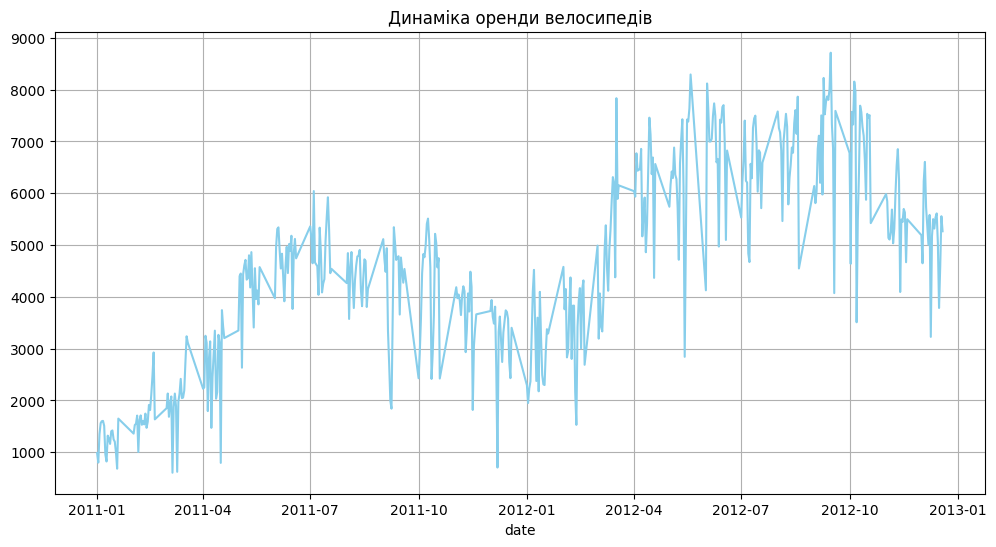

In [7]:
daily_count = df.groupby('date')['count'].sum()
daily_count.plot(
    figsize=(12, 6), 
    color='skyblue',
    title='Динаміка оренди велосипедів',
    grid=True
);

Відповіді:
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
   Візуалізація динаміки оренди велосипедів представдено поденно, через що на графіку можливі "заломи", оскільки оренда залежить від погоди, днів тижня чи ще якись випадкових подій(святкові дні,  високий рівень забруднення повітря, якщо це локальна оренда - закриття локації, чи навчпаки проводження фестивалю)
   Щоб прибрати "заломи", можна зробити агрегацію за тижнями чи місяцями, щоб змякчити дані.
2. Які загальні тенденції ви бачите на графіку?
   загальні тенденції з даних графіка вказують на зростаючу тенденцію з періоду 2011 року до 2012, показники оренди по днях більше в 2012 році, порівняно з 2011.
3. Чи помітні якісь сезонні коливання?
   Прослідковується помітний спад показників оренди в зимовий період та збільшення в теплий. ДЛя кращої візуалізації сезонності дацільно використати посезонну агрегацію.
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?
   Так, є простлідковуються аномальнонизькі та високі значення, що зумовленні зовнішніми чинниками.


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами(кварталами). Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте квартали не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який квартал найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним кварталми?

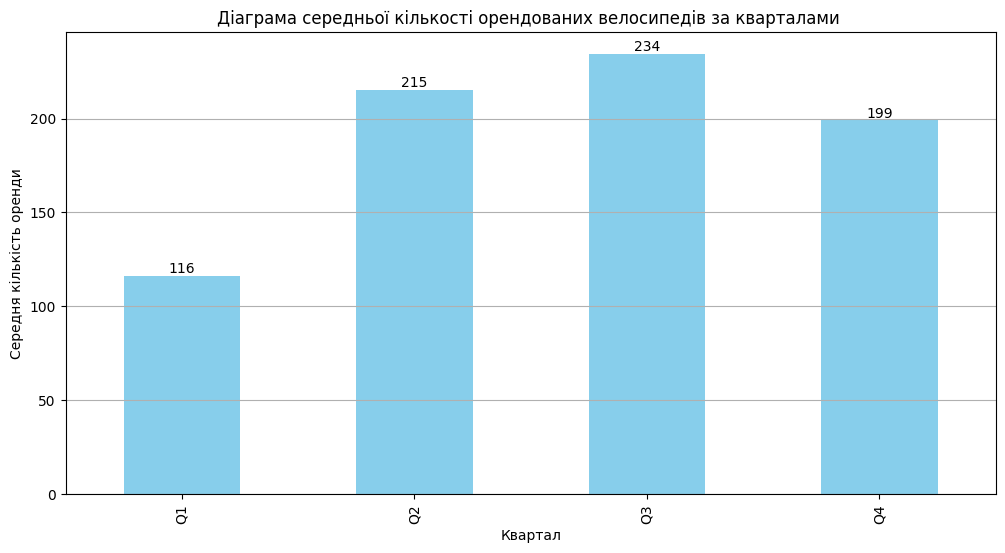

In [8]:
avg_season = df.groupby('season')['count'].mean()

season_names = {
    1:'Q1',
    2:'Q2',
    3:'Q3',
    4:'Q4'
}
avg_season.index = avg_season.index.map(season_names)
ax1 = avg_season.plot.bar(
     figsize=(12, 6),
    color = 'skyblue',
    title='Діаграма середньої кількості орендованих велосипедів за кварталами ',    
)
ax1.set_ylabel('Середня кількість оренди')
ax1.set_xlabel('Квартал')
ax1.grid(axis='y')
for c in ax1.containers:
    ax1.bar_label(c, fmt='%.0f')

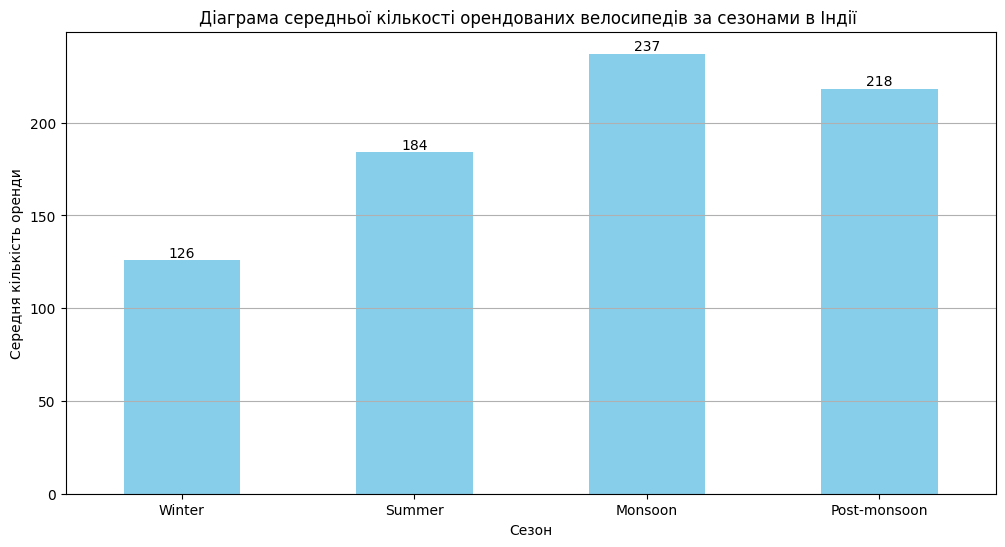

In [9]:
month = df.index.month
df['season_india'] = month.map({
    12: 'Winter', 1:'Winter', 2:'Winter',
    3:'Summer', 4:'Summer', 5:'Summer',
    6:'Monsoon', 7:'Monsoon', 8:'Monsoon',
    9:'Post-monsoon', 10:'Post-monsoon', 11:'Post-monsoon'
} )
season_order = ['Winter', 'Summer', 'Monsoon', 'Post-monsoon']
avr_season_india = df.groupby('season_india')['count'].mean()
avr_season_india = avr_season_india.reindex(season_order)
ax2 = avr_season_india.plot.bar(
    figsize=(12, 6),
    color = 'skyblue',
    title='Діаграма середньої кількості орендованих велосипедів за сезонами в Індії '
)
ax2.set_ylabel('Середня кількість оренди')
ax2.set_xlabel('Сезон')
ax2.grid(axis = 'y')

for c in ax2.containers:
    ax2.bar_label(c, fmt="%.0f")
ax2.set_xticklabels(
    ax2.get_xticklabels(),
    rotation=0,
    ha='center'
);

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


In [10]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'date', 'day',
       'week', 'weekday_num', 'weekday', 'year', 'month', 'hour',
       'season_india'],
      dtype='object')

''

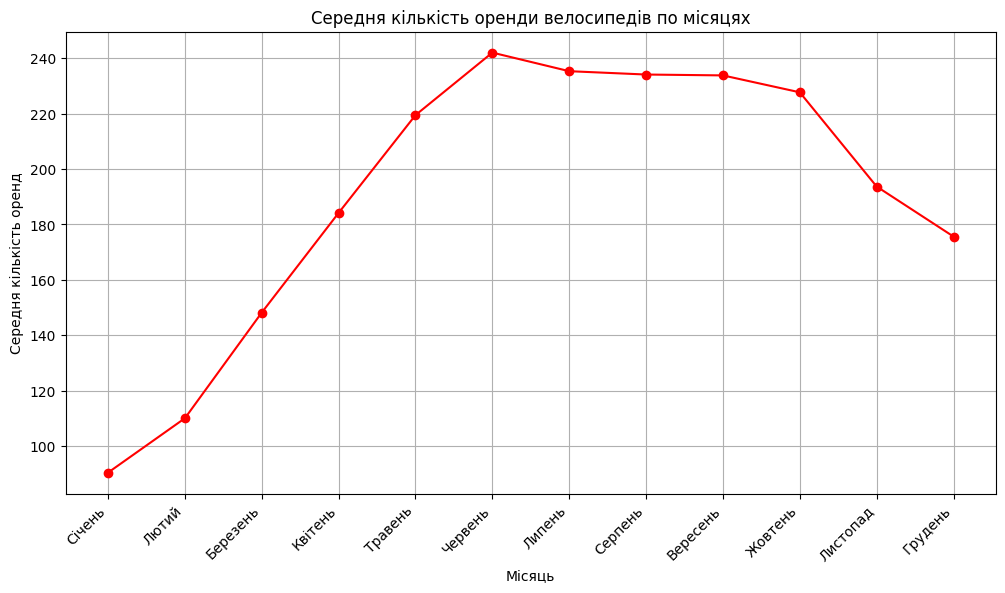

In [11]:
avg_month = df.groupby('month')['count'].mean()
month_names = {
    1:'Січень',
    2:'Лютий',
    3:'Березень',
    4:'Квітень',
    5: 'Травень',
    6: 'Червень',
    7: 'Липень',
    8: 'Серпень',
    9: 'Вересень',
    10: 'Жовтень',
    11: 'Листопад',
    12: 'Грудень'
}
avg_month.index = avg_month.index.map(month_names)

ax3 = avg_month.plot(
    figsize=(12, 6), 
    color='red',
    marker = 'o',
    title='Середня кількість оренди велосипедів по місяцях',
    grid=True
)
ax3.set_xlabel('Місяць')
ax3.set_ylabel('Середня кількість оренд')

ax3.tick_params(axis='x', labelrotation=45)
ax3.set_xticks(range(len(avg_month)))
ax3.set_xticklabels(avg_month.index, rotation=45, ha='right')
;


1. В які місяці спостерігається пік та спад оренди?
   Пік оренди припадає на червень, спад - січень.
2. Чи збігається ця закономірність з результатами з попереднього завдання?
   Так, ця закономірність узгоджується з попереднім аналізом сезонності, де було виявлено, що в теплі періоди року попит на оренду велосипедів зростає, а в холодні — зменшується.
4. Як може вплинути клімат на оренду велосипедів протягом року?
   Клімат безпосередньо впливає на попит на оренду велосипедів. Тепла та суха погода сприяє активному використанню велосипедів для відпочинку та пересування, тоді як холод, дощі або несприятливі погодні умови знижують готовність користувачів орендувати велосипеди. Це пояснює зростання оренд у літні місяці та спад у зимовий період.

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

In [12]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'date', 'day',
       'week', 'weekday_num', 'weekday', 'year', 'month', 'hour',
       'season_india'],
      dtype='object')

''

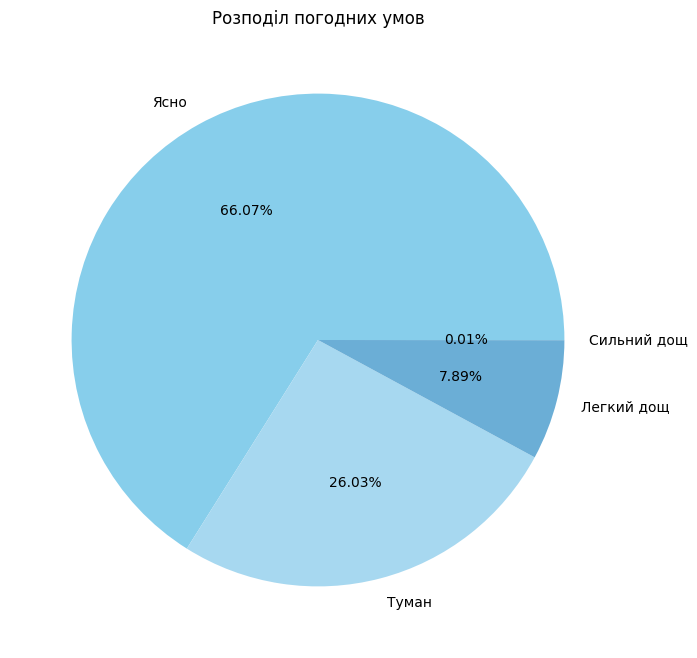

In [13]:
weather_count = df['weather'].value_counts().sort_index()
weather_labels = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}
colors = [
    '#87CEEB',
    '#A7D8F0', 
    '#6BAED6',  
    '#9ECAE1'   
]
labels = weather_count.index.map(weather_labels)
ax4 = weather_count.plot.pie(
    figsize=(8, 8),
    autopct='%1.2f%%',
    labels=labels,
    title='Розподіл погодних умов',
    colors = colors
)
ax4.set_xlabel('')
ax4.set_ylabel('')
;

Очікуваний результат:

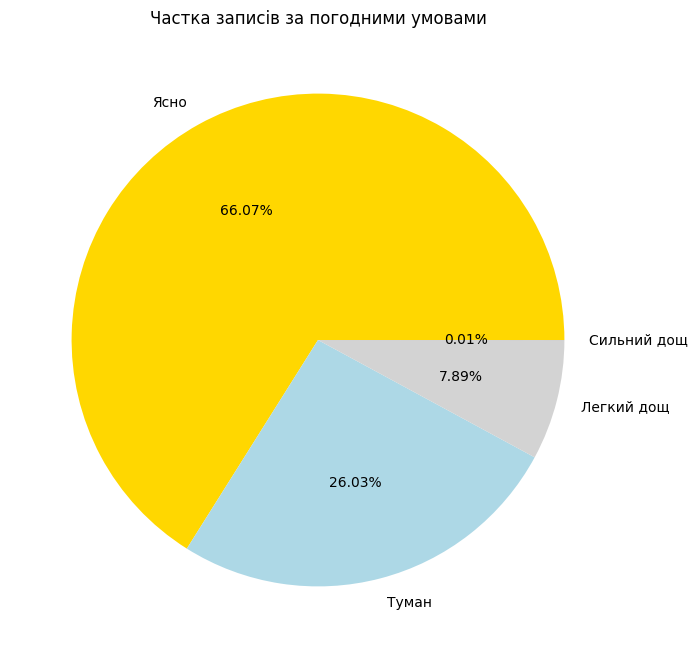

1. Яка погода переважає в датасеті?

У датасеті переважає ясна погода, що становить найбільшу частку всіх записів. 
Це свідчить про те, що більшість спостережень припадає на сприятливі погодні умови.

2. Чи є дні із сильним дощем? Яка їх частка?

Так, у даних присутні дні із сильним дощем, однак їх частка є дуже незначною (близько 0,01%). 
Це означає, що такі погодні умови трапляються рідко та мають мінімальний вплив на загальну структуру даних.

3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

Погодні умови суттєво впливають на попит на оренду велосипедів. 
Сприятлива погода (ясно або без опадів) стимулює активніше користування велосипедами, тоді як несприятливі умови, 
зокрема сильний дощ або туман, знижують готовність користувачів орендувати велосипеди через питання комфорту та безпеки. 
Це пояснює, чому в датасеті спостерігається значна перевага днів з хорошими погодними умовами.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

In [14]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'date', 'day',
       'week', 'weekday_num', 'weekday', 'year', 'month', 'hour',
       'season_india'],
      dtype='object')

''

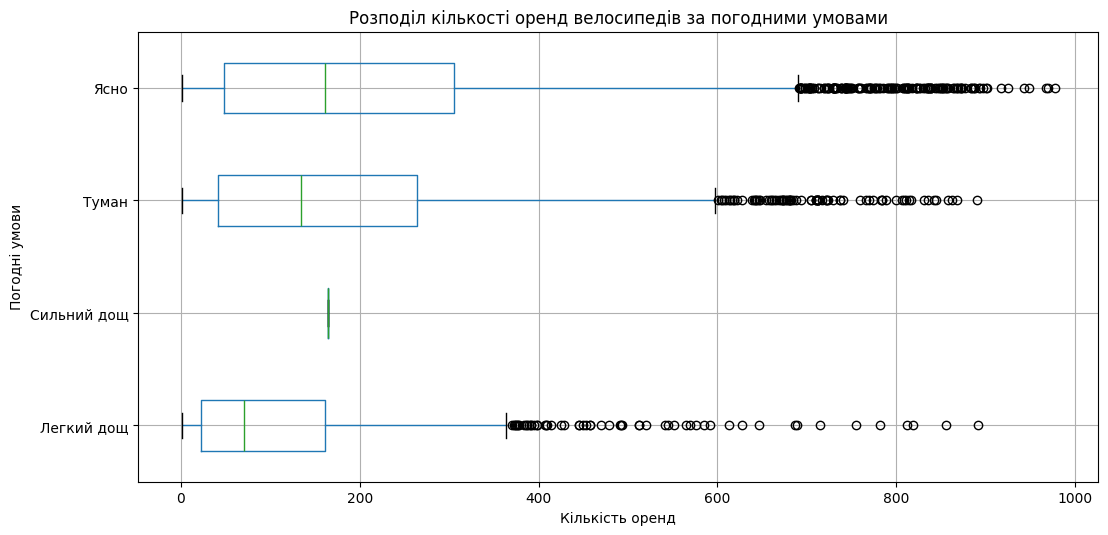

In [15]:
weather_labels = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}
df['weather_name']=df['weather'].map(weather_labels)
ax5 = df.boxplot(
    column = 'count',
    by = 'weather_name',
    figsize=(12, 6),
    vert=False
)
ax5.set_title('Розподіл кількості оренд велосипедів за погодними умовами')
ax5.set_xlabel('Кількість оренд')
ax5.set_ylabel('Погодні умови')
plt.suptitle('')
;

1. При якій погоді найбільший розкид у кількості оренди?
Найбільший розкид у кількості оренд спостерігається при ясній погоді.
При цьому медіана знаходиться приблизно посередині розподілу, але видно багато значних відхилень у більший бік, що свідчить про пікові значення оренди в окремі дні.
2. Чи є викиди (outliers) в даних? При якій погоді?
Викиди присутні майже для всіх типів погоди, крім “Сильного дощу”.
Це пояснюється тим, що при сильному дощі кількість оренд дуже мала, розподіл сплющений і викидів фактично немає.
Найбільше викидів спостерігається при ясній погоді, де вони відповідають позитивним пікам кількості оренд велосипедів.
3. При якій погоді медіанне значення оренди найвище?
Найвище медіанне значення кількості оренд спостерігається при ясній погоді, що означає стабільно високий попит у такі дні.


## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

**Увага!** За замовченням буде колір

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

''

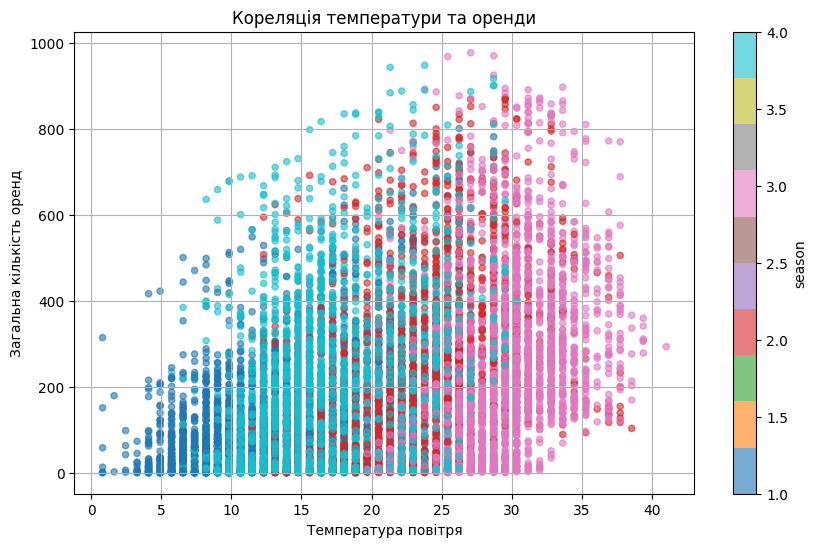

In [ ]:
ax6 = df.plot.scatter(
    x='temp',
    y='count',
    c='season',
    cmap='tab10',
    alpha=0.6,
    figsize=(10, 6),
    grid=True
)
ax6.set_title('Кореляція температури та оренди')
ax6.set_xlabel('Температура повітря')
ax6.set_ylabel('Загальна кількість оренд')
;


Чи є зв'язок між температурою та кількістю оренди? Який?
Так, між температурою повітря та кількістю оренди велосипедів спостерігається позитивний зв’язок. За низьких температур кількість оренд невелика, зі зростанням температури кількість оренд збільшується - найбільша концентрація високих значень оренди припадає на теплі місяці
Проте звязок не лінійний та не ідеальний , є розкид значень, що свідчить про вплив на кількість оренди додаткових факторів , крім температури.

## (Опціонально) Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

In [ ]:
df.head(5)

In [ ]:
avg_weekday = df.groupby('weekday')[['casual', 'registered']].mean()
weekday_order =['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
avg_weekday = avg_weekday.reindex(weekday_order)
ax7 = avg_weekday.plot.bar(
    stacked=True,
    figsize=(12, 6),
    color=['#90CAF9', '#1565C0']
)
ax7.set_title('Середня кількість оренд велосипедів за днями тижня')
ax7.set_xlabel('День тижня')
ax7.set_ylabel('Середня кількість оренд')
ax7.legend(title='Тип користувача')
;

1. В які дні тижня більше оренд від зареєстрованих користувачів?
Оренд від зареєстрованих споживажів більше, особливо в їх частка більша в будні дні, у вихідні частка незареєстровах дещо більша порівняно з будніми.

2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?
Вищу активність зареєстрованих користувачів у будні дні можна пояснити тим, що вони використовують велосипеди як регулярний засіб пересування (дорога на роботу або навчання або повсяк час обирають даний сервіс оренди, тому логічно є зареєстрованими). Натомість випадкові користувачі частіше орендують велосипеди більш імпульсивно(відпочинок, прогулянка) тому їхня частка зростає у вихідні дні, коли люди мають більше вільного часу.
